<a href="https://colab.research.google.com/github/0llhjr/AI-SHOPPING-SYSTEM./blob/main/Asian_vs_African_Elephant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [12]:
train_dir = '/content/drive/MyDrive/elephants_dataset/train'
test_dir = '/content/drive/MyDrive/elephants_dataset/test'

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import os

print("Training set:")
print("African elephants:", len(os.listdir('/content/drive/MyDrive/elephants_dataset/train/African')))
print("Asian elephants:", len(os.listdir('/content/drive/MyDrive/elephants_dataset/train/Asian')))

print("\nTesting set:")
print("African elephants:", len(os.listdir('/content/drive/MyDrive/elephants_dataset/test/African')))
print("Asian elephants:", len(os.listdir('/content/drive/MyDrive/elephants_dataset/test/Asian')))



Training set:
African elephants: 420
Asian elephants: 420

Testing set:
African elephants: 97
Asian elephants: 91


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 672 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 120s 6s/step - accuracy: 0.4927 - loss: 1.1973 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.4865 - loss: 0.6968 - val_accuracy: 0.5179 - val_loss: 0.6930
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step - accuracy: 0.6198 - loss: 0.6850 - val_accuracy: 0.5060 - val_loss: 0.6978
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.5723 - loss: 0.6807 - val_accuracy: 0.5714 - val_loss: 0.7177
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.6826 - loss: 0.6016 - val_accuracy: 0.5357 - val_loss: 0.7296
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.7357 - loss: 0.5638 - val_accuracy: 0.4940 - val_loss: 0.7796
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.8203 - loss: 0.4816 - val_accuracy: 0.5238 - val_loss: 0.8356
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.8248 - loss: 0.4093 - val_accuracy: 0.5000 - v

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/elephants_dataset/train'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 672 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.5041 - loss: 4.0615 - val_accuracy: 0.5119 - val_loss: 0.6986
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.5583 - loss: 0.6823 - val_accuracy: 0.5655 - val_loss: 0.6883
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.6563 - loss: 0.6509 - val_accuracy: 0.5595 - val_loss: 0.7181
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.7146 - loss: 0.5601 - val_accuracy: 0.5179 - val_loss: 0.8486
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.7817 - loss: 0.4916 - val_accuracy: 0.4702 - val_loss: 0.9582
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.8614 - loss: 0.3495 - val_accuracy: 0.4524 - val_loss: 1.0852
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.9168 - loss: 0.3045 - val_accuracy: 0.4702 - val_loss: 1.3183
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.9403 - loss: 0.1789 - val_accuracy: 0.4583 - val_loss

In [ ]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


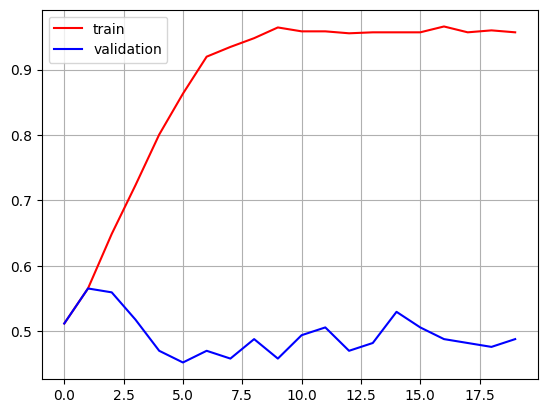

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.grid(True)
plt.show()


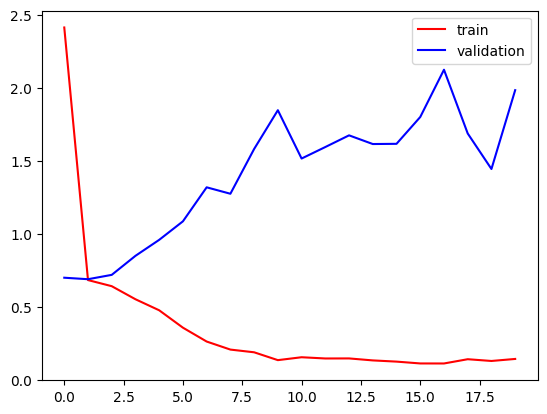

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 8s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("the confusion Matrix:")
print(cm)

print("Classification Report is")
print(classification_report(true_labels, predicted_labels))

the confusion Matrix:
[[38 59]
 [41 50]]
Classification Report is
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        97
           1       0.46      0.55      0.50        91

    accuracy                           0.47       188
   macro avg       0.47      0.47      0.47       188
weighted avg       0.47      0.47      0.46       188



In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=validation_data)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 167s 8s/step - accuracy: 0.4708 - loss: 10.2404 - val_accuracy: 0.5119 - val_loss: 7.2752
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step - accuracy: 0.5966 - loss: 4.1599 - val_accuracy: 0.5476 - val_loss: 2.9298
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 151s 7s/step - accuracy: 0.6004 - loss: 2.9450 - val_accuracy: 0.5417 - val_loss: 2.8650
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step - accuracy: 0.6511 - loss: 2.2129 - val_accuracy: 0.5298 - val_loss: 3.9762
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 148s 7s/step - accuracy: 0.6908 - loss: 1.9047 - val_accuracy: 0.5476 - val_loss: 5.0137
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 207s 7s/step - accuracy: 0.7540 - loss: 1.2064 - val_accuracy: 0.5119 - val_loss: 9.5909
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 160s 8s/step - accuracy: 0.7272 - loss: 1.3907 - val_accuracy: 0.5000 - val_loss: 5.9250
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 151s 7s/step - accuracy: 0.7305 - loss: 1.4928 - val_accuracy: 0.5119 - 

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[50 47]
 [45 46]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52        97
           1       0.49      0.51      0.50        91

    accuracy                           0.51       188
   macro avg       0.51      0.51      0.51       188
weighted avg       0.51      0.51      0.51       188



In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [31]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
train_dir = '/mnt/data/dataset/train'


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/elephants_dataset/train'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

history = resnet_model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data
)


Found 672 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 232s 10s/step - accuracy: 0.4874 - loss: 4.4858 - val_accuracy: 0.4762 - val_loss: 0.7152
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 194s 9s/step - accuracy: 0.5167 - loss: 0.9077 - val_accuracy: 0.5000 - val_loss: 1.0198
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 210s 10s/step - accuracy: 0.5482 - loss: 0.7984 - val_accuracy: 0.5060 - val_loss: 0.7110
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 255s 9s/step - accuracy: 0.5888 - loss: 0.6518 - val_accuracy: 0.4702 - val_loss: 0.7539
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 188s 9s/step - accuracy: 0.5430 - loss: 0.7045 - val_accuracy: 0.5060 - val_loss: 0.7840
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 209s 9s/step - accuracy: 0.5524 - loss: 0.6679 - val_accuracy: 0.5298 - val_loss: 0.7141
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 188s 9s/step - accuracy: 0.5997 - loss: 0.6633 - val_accuracy: 0.5179 - val_loss: 0.7236
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 184s 9s/step - accuracy: 0.6267 - loss: 0.6265 - val_accuracy: 0.4940 -

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/drive/MyDrive/elephants_dataset/test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

predictions = resnet_model.predict(test_data)


Found 188 images belonging to 2 classes.
6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 12s/step


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[63 34]
 [24 67]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        97
           1       0.66      0.74      0.70        91

    accuracy                           0.69       188
   macro avg       0.69      0.69      0.69       188
weighted avg       0.69      0.69      0.69       188

